In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [4]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [6]:
df = pd.read_csv("withoutoutliers_autoscout.csv")
df

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age
0,Sedans,15770.000,VAT deductible,56013.000,66.000,Used,2.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1500.000,3.000,1220.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,3.000
1,Sedans,14500.000,Price negotiable,80000.000,141.000,Used,1.000,0.000,Audi,A1,Red,Metallic,Cloth,3.000,4.000,Automatic,1800.000,4.000,1255.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,Unknown,5.600,2.000
2,Sedans,14640.000,VAT deductible,83450.000,85.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,4.000,4.000,Automatic,1600.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,3.000
3,Sedans,14500.000,VAT deductible,73000.000,66.000,Used,1.000,0.000,Audi,A1,Brown,Metallic,Cloth,3.000,4.000,Automatic,1500.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,Unknown,3.800,3.000
4,Sedans,16790.000,VAT deductible,16200.000,66.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1500.000,3.000,1195.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Germany,4.100,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Van,39950.000,VAT deductible,16.987,147.000,New,0.000,1.000,Renault,Espace,Grey,Metallic,Full leather,5.000,5.000,Automatic,2000.000,4.000,1758.000,front,Diesel,139.000,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.000,Unknown,5.300,0.000
15915,Van,39885.000,VAT deductible,9900.000,165.000,Used,1.000,0.000,Renault,Espace,Grey,Metallic,Cloth,5.000,5.000,Automatic,1800.000,4.000,1708.000,front,Benzine,164.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,Germany,7.400,0.000
15916,Van,39875.000,VAT deductible,15.000,146.000,Pre-registered,1.000,0.000,Renault,Espace,White,Metallic,Full leather,5.000,7.000,Automatic,2000.000,4.000,1685.000,front,Diesel,139.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,Austria,5.300,0.000
15917,Van,39700.000,VAT deductible,10.000,147.000,Pre-registered,1.000,0.000,Renault,Espace,Grey,Metallic,Part leather,5.000,7.000,Automatic,2000.000,4.000,1758.000,front,Diesel,139.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.000,Unknown,5.300,0.000

In [7]:
pd.get_dummies(df, columns=["body_type", "vat", "type", "make", "model", "body_color", "paint_type", "upholstery", "gearing_type", "drive_chain", "fuel", "emission_class", "country_version"])

,price_€,km,hp_kW,previous_owners,warranty,nr_of_doors,nr_of_seats,engine_displacement_cc,cylinders,weight_kg,co2e_g,comfort&convenience,entertainment&media,extras,safety&security,gears,consumption_comb,age,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_Cloth,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP,country_version_Austria,country_version_Belgium,country_version_Bulgaria,country_version_Croatia,country_version_Czech Republic,country_version_Denmark,country_version_Egypt,country_version_European Union,country_version_France,country_version_Germany,country_version_Hungary,country_version_Italy,country_version_Japan,country_version_Luxembourg,country_version_Netherlands,country_version_Poland,country_version_Romania,country_version_Serbia,country_version_Slovakia,country_version_Slovenia,country_version_Spain,country_version_Sweden,country_version_Switzerland,country_version_Unknown
0,15770.000,56013.000,66.000,2.000,0.000,5.000,5.000,1500.000,3.000,1220.000,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.800,3.000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,14500.000,80000.000,141.000,1.000,0.000,3.000,4.000,1800.000,4.000,1255.000,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,5.600,2.000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,14640.000,83450.000,85.000,1.000,0.000,4.000,4.000,1600.000,3.000,1195.000,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.800,3.000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14500.000,73000.000,66.000,1.000,0.000,3.000,4.000,1500.000,3.000,1195.000,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.800,3.000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,16790.000,16200.000,66.000,1.000,0.000,5.000,5.000,1500.000,3.000,1195.000,109.000,"Air conditioning,Armrest,Automatic climate con...",

In [8]:
df_dummy1 = pd.get_dummies(df, columns=["body_type", "vat", "type", "make", "model", "body_color", "paint_type", "upholstery", "gearing_type", "drive_chain", "fuel", "emission_class", "country_version"])

In [9]:
df["comfort&convenience"].str.get_dummies(sep=",").add_prefix("c&c_")



,c&c_Air conditioning,c&c_Air suspension,c&c_Armrest,c&c_Automatic climate control,c&c_Auxiliary heating,c&c_Cruise control,c&c_Electric Starter,c&c_Electric tailgate,c&c_Electrical side mirrors,c&c_Electrically adjustable seats,c&c_Electrically heated windshield,c&c_Heads-up display,c&c_Heated steering wheel,c&c_Hill Holder,c&c_Keyless central door lock,c&c_Leather seats,c&c_Leather steering wheel,c&c_Light sensor,c&c_Lumbar support,c&c_Massage seats,c&c_Multi-function steering wheel,c&c_Navigation system,c&c_Panorama roof,c&c_Park Distance Control,c&c_Parking assist system camera,c&c_Parking assist system self-steering,c&c_Parking assist system sensors front,c&c_Parking assist system sensors rear,c&c_Power windows,c&c_Rain sensor,c&c_Seat heating,c&c_Seat ventilation,c&c_Split rear seats,c&c_Start-stop system,c&c_Sunroof,c&c_Tinted windows,c&c_Wind deflector,c&c_Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [12]:
comfort_dummy = df["comfort&convenience"].str.get_dummies(sep=",").add_prefix("c&c_")

In [11]:
df["entertainment&media"].str.get_dummies(sep=",").add_prefix("e&m_")


,e&m_Bluetooth,e&m_CD player,e&m_Digital radio,e&m_Hands-free equipment,e&m_MP3,e&m_On-board computer,e&m_Radio,e&m_Sound system,e&m_Television,e&m_USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [13]:
entertainment_dummy = df["entertainment&media"].str.get_dummies(sep=",").add_prefix("e&m_")



In [14]:
df["extras"].str.get_dummies(sep=",").add_prefix("extras_")

,extras_Alloy wheels,extras_Cab or rented Car,extras_Catalytic Converter,extras_Handicapped enabled,extras_Right hand drive,extras_Roof rack,extras_Shift paddles,extras_Ski bag,extras_Sliding door,extras_Sport package,extras_Sport seats,extras_Sport suspension,extras_Touch screen,extras_Trailer hitch,extras_Tuned car,extras_Voice Control,extras_Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
extras_dummy = df["extras"].str.get_dummies(sep=",").add_prefix("extras_")

In [16]:
df["safety&security"].str.get_dummies(sep=",").add_prefix("s&s_")

,s&s_ABS,s&s_Adaptive Cruise Control,s&s_Adaptive headlights,s&s_Alarm system,s&s_Blind spot monitor,s&s_Central door lock,s&s_Central door lock with remote control,s&s_Daytime running lights,s&s_Driver drowsiness detection,s&s_Driver-side airbag,s&s_Electronic stability control,s&s_Emergency brake assistant,s&s_Emergency system,s&s_Fog lights,s&s_Head airbag,s&s_Immobilizer,s&s_Isofix,s&s_LED Daytime Running Lights,s&s_LED Headlights,s&s_Lane departure warning system,s&s_Night view assist,s&s_Passenger-side airbag,s&s_Power steering,s&s_Rear airbag,s&s_Side airbag,s&s_Tire pressure monitoring system,s&s_Traction control,s&s_Traffic sign recognition,s&s_Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [17]:
safety_dummy = df["safety&security"].str.get_dummies(sep=",").add_prefix("s&s_")

In [ ]:
df_dummy1.join([comfort_dummy, entertainment_dummy, extras_dummy, safety_dummy])


In [18]:
df_final = df_dummy1.join([comfort_dummy, entertainment_dummy, extras_dummy, safety_dummy])

In [19]:
df_final.drop(columns=["comfort&convenience", "entertainment&media", "extras", "safety&security"], inplace=True)

In [20]:
df_final

,price_€,km,hp_kW,previous_owners,warranty,nr_of_doors,nr_of_seats,engine_displacement_cc,cylinders,weight_kg,co2e_g,gears,consumption_comb,age,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_Cloth,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP,country_version_Austria,country_version_Belgium,country_version_Bulgaria,country_version_Croatia,country_version_Czech Republic,country_version_Denmark,country_version_Egypt,country_version_European Union,country_version_France,country_version_Germany,country_version_Hungary,country_version_Italy,country_version_Japan,country_version_Luxembourg,country_version_Netherlands,country_version_Poland,country_version_Romania,country_version_Serbia,country_version_Slovakia,country_version_Slovenia,country_version_Spain,country_version_Sweden,country_version_Switzerland,country_version_Unknown,c&c_Air conditioning,c&c_Air suspension,c&c_Armrest,c&c_Automatic climate control,c&c_Auxiliary heating,c&c_Cruise control,c&c_Electric Starter,c&c_Electric tailgate,c&c_Electrical side mirrors,c&c_Electrically adjustable seats,c&c_Electrically heated windshield,c&c_Heads-up display,c&c_Heated steering wheel,c&c_Hill Holder,c&c_Keyless central door lock,c&c_Leather seats,c&c_Leather steering wheel,c&c_Light sensor,c&c_Lumbar support,c&c_Massage seats,c&c_Multi-function steering wheel,c&c_Navigation system,c&c_Panorama roof,c&c_Park Distance Control,c&c_Parking assist system camera,c&c_Parking assist system self-steering,c&c_Parking assist system sensors front,c&c_Parking assist system sensors rear,c&c_Power windows,c&c_Rain sensor,c&c_Seat heating,c&c_Seat ventilation,c&c_Split rear seats,c&c_Start-stop system,c&c_Sunroof,c&c_Tinted windows,c&c_Wind deflector,c&c_Windshield,e&m_Bluetooth,e&m_CD player,e&m_Digital radio,e&m_Hands-free equipment,e&m_MP3,e&m_On-board computer,e&m_Radio,e&m_Sound system,e&m_Television,e&m_USB,extras_Alloy wheels,extras_Cab or rented Car,extras_Catalytic Converter,extras_Handicapped enabled,extras_Right hand drive,extras_Roof rack,extras_Shift paddles,extras_Ski bag,extras_Sliding door,extras_Sport package,extras_Sport seats,extras_Sport suspension,extras_Touch screen,extras_Trailer hitch,extras_Tuned car,extras_Voice Control,extras_Winter tyres,s&s_ABS,s&s_Adaptive Cruise Control,s&s_Adaptive headlights,s&s_Alarm system,s&s_Blind spot monitor,s&s_Central door lock,s&s_Central door lock with remote control,s&s_Daytime running lights,s&s_Driver drowsiness detection,s&s_Driver-side airbag,s&s_Electronic stability control,s&s_Emergency brake assistant,s&s_Emergency system,s&s_Fog lights,s&s_Head airbag,s&s_Immobilizer,s&s_Isofix,s&s_LED Daytime Running Lights,s&s_LED Headlights,s&s_Lane departure warning system,s&s_Night view assist,s&s_Passenger-side airbag,s&s_Power steering,s&s_Rear airbag,s&s_Side airbag,s&s_Tire pressure monitoring system,s&s_Traction control,s&s_Traffic sign recognition,s&s_Xenon headlights
0,15770.000,56013.000,66.000,2

<AxesSubplot:>

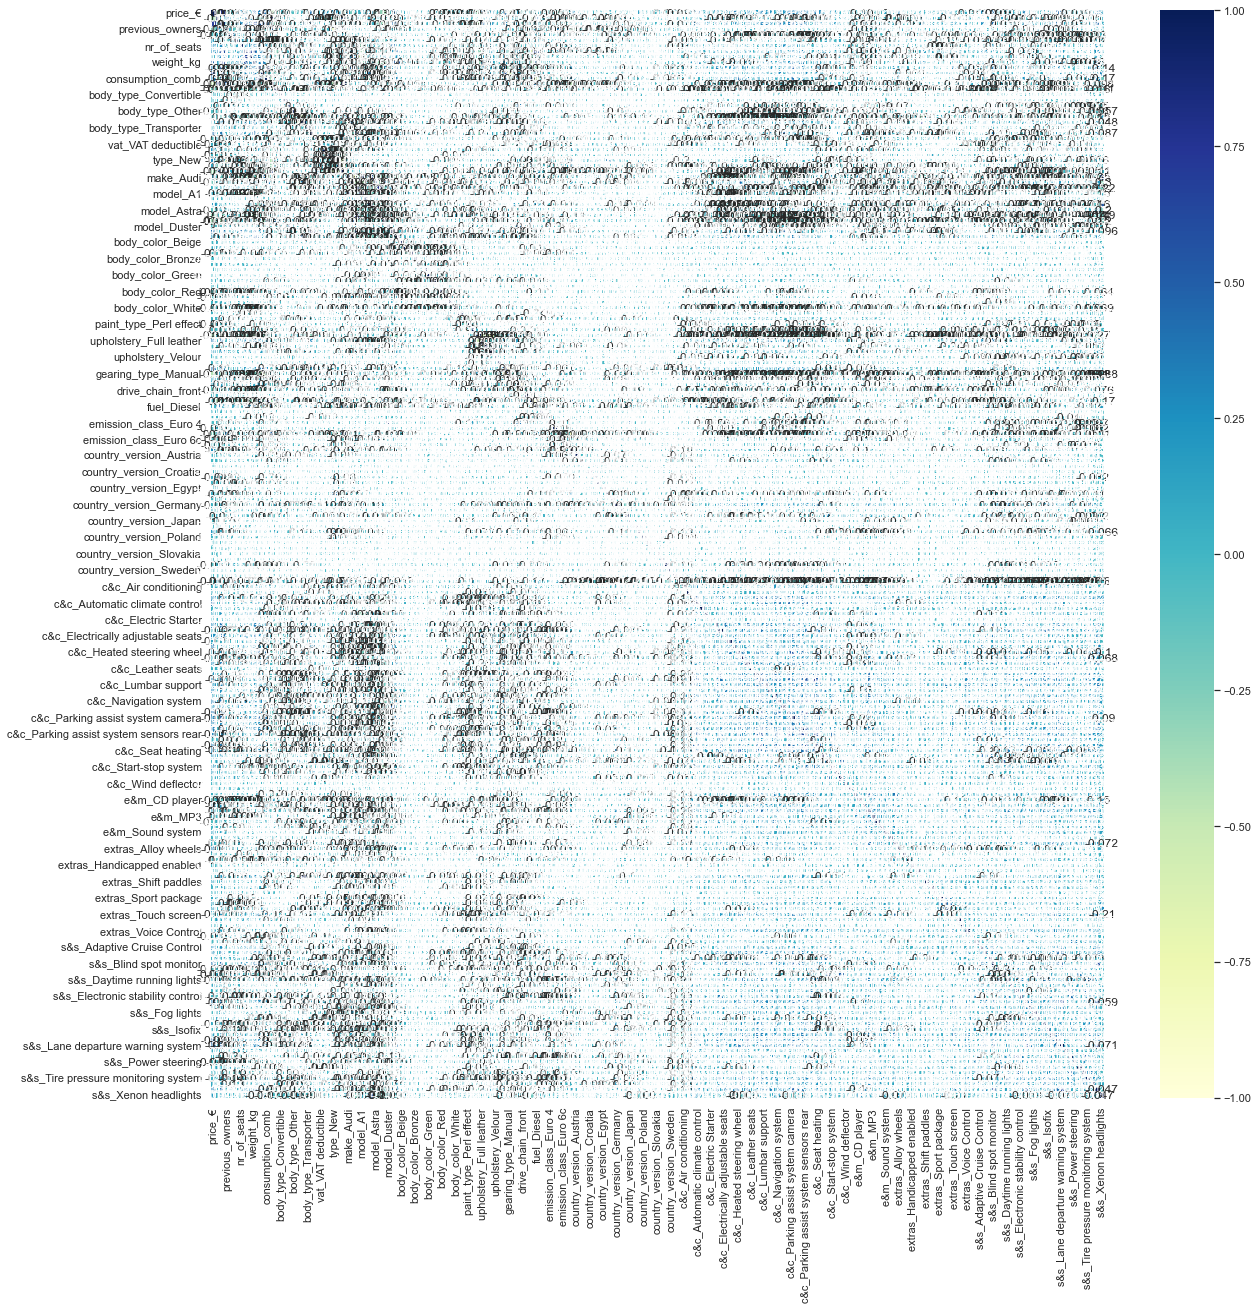

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_final.corr(),cmap="YlGnBu", annot=True)

In [22]:
df.to_csv("getdummied_autoscout.csv", index=False)